<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Teguh !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Teguh ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Teguh dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Konten <a id='back'></a>

* [Tahap 2 Pendahuluan](#intro)
     * [2.1 Inisialisasi](#inisialisasi)
     * [2.2 Memuat Data](#memuat_Data)
     * [2.3 Mempersiapkan Data](#mempersiapkan)
     * [2.4 Paket Prabayar](#prabayar)
     * [2.5 Pengguna](#user)
     * [2.6 Panggilan](#panggilan)
     * [2.7 Pesan/SMS](#sms)
     * [2.8 Internet](#internet)
     * [2.9 Mempelajari Syarat dan Kondisi terkait](#syarat_dan_kondisi)
     * [2.10 Menagregasi Data per Pengguna](#agregasi)
     * [2.11 Mempelajari Perilaku Pengguna](#perilaku)
* [Tahap 3 Menguji Hipotesis Statistik](#hipotesis)
* [Tahap 4 Kesimpulan Umum](#kesimpulan)

# Pendahuluan

Pada proyek ini kita akan melakukan analisis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Kita memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Untuk itu kita akan menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan. 

Serta kita akan menguji 2 hipotesis, yaitu:
- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.





Adapun langkah-langkah yang dilakukan adalah :
- Mempelajari dan memperbaiki kualitas data dimana kita memiliki 5 dataset pada proyek kali ini.
- Mengagregasi data per pengguna
- Mempelajari perilaku pengguna
- Menghitung pendapatan dari ke-dua jenis paket
- Menguji Hipotesis
- Kesimpulan Umum

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Inisialisasi

Pertama kita akan mengimport library yang dibutuhkan untuk membantu proses analisis.

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Memuat Data

Saatnya membaca dataset yang terdiri dari 5 file dan menyimpannya ke dataframe yang terpisah.

Note: Karena pada file megaline_user.csv pada kolom `churn_date` berisi tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat). Maka ditetapkan untuk membiarkan string kosong pada dataset df_user.

In [2]:
## memuat data calls (panggilan)
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
## memuat data internet 
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
## memuat data message
df_message = pd.read_csv('/datasets/megaline_messages.csv')
## memuat data plans (paket prabayar)
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
## memuat data user (pengguna)
df_user = pd.read_csv('/datasets/megaline_users.csv', keep_default_na=False)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Mempersiapkan Data

Mari kita lihat informasi dan deskripsi umum disetiap dataset guna memperbaiki kualitas data-nya jika diperlukan. 

## Paket Prabayar

In [3]:
# menampilkan informasi umum
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# menampilkan contoh data
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Pada dataset paket prabayar sepertinya kualitas data sudah sesuai dan dataset ini merupakan informasi detail dari kedua paket `Surf` dan `Ultimate`.

## Pengguna

In [5]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
#menampilkan deskripsi umum
df_user.describe(include='all')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,500
unique,NaN,458,399,NaN,73,266,2,30
top,NaN,Seymour,Morrison,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,
freq,NaN,3,3,NaN,80,5,339,466
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN


In [7]:
# Tampilkan sampel data pengguna
df_user.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
11,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,
71,1071,Isa,Roy,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-23,surf,
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,
26,1026,Meggan,Hamilton,49,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-20,ultimate,
317,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,
32,1032,Delila,Dalton,59,"Birmingham-Hoover, AL MSA",2018-06-07,ultimate,
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,


Sepertinya ada beberapa kolom yang tipe data-nya tidak sesuai akan tetapi saya hanya akan mengganti tipe data pada kolom `reg_date` ke datetime.

### Memperbaiki Data

Mari kita lakukan perbaikan data pada kolom `reg_date`.

In [8]:
# memperbaiki tipe data pada kolom reg_date
df_user['reg_date'] = pd.to_datetime(df_user['reg_date'], format='%Y-%m-%d')

In [9]:
# melihat sample dari df_user
df_user.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
423,1423,Malcom,Neal,61,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-16,surf,
447,1447,Ramon,Hester,62,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-01,surf,
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,
208,1208,Enrique,Ramirez,44,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-17,surf,
222,1222,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-27,surf,


### Memperkaya Kualitas Data

Saatnya untuk menambahkan kolom `region` dan mengatur value-nya menjadi `NY-NJ` dan `Other`. Hal ini dilakukan karena bertujuan untuk menguji hipotesis ke-2, dimana melihat perbandingan pendapatan `NY-NJ` dengan daerah lain.

In [10]:
# membuat kolom baru dgn nama region
df_user['region'] = df_user['city'].apply(lambda x: x.lstrip().split(", ")[1]) #mendapatkan NY-NJ yang merupakan index ke-1
# mengubah nilai pada kolom region selain NY-NJ ke Other
pattern = "NY-NJ-PA MSA"
df_user['region'] = df_user['region'].where(df_user['region'] == pattern, 'Other')
# Melihat value dari ragion setelah dilakukan perubahan
df_user['region'].value_counts()

Other           420
NY-NJ-PA MSA     80
Name: region, dtype: int64

In [11]:
# melihat sample
df_user.sample(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
292,1292,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,surf,,Other
409,1409,Elvis,Vargas,38,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-10-04,ultimate,,Other
225,1225,Margarito,Barker,41,"Columbia, SC MSA",2018-06-07,surf,,Other


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Panggilan

In [12]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Tampilkan sampel data berisi panggilan
df_calls.sample(5)

,id,user_id,call_date,duration
93850,1335_79,1335,2018-11-13,3.00
116703,1408_352,1408,2018-03-02,4.67
129098,1465_338,1465,2018-11-27,6.56
19540,1073_420,1073,2018-07-25,0.00
23872,1090_43,1090,2018-10-13,8.02


Kolom ini juga harus mengganti tipe data pada kolom `call_date` ke datetime dan menambahkan kolom baru dengan nama `duration_ceil` dimana setiap panggilan pengguna dibulatkan keatas sesuai dengan ketentuan dari Megaline.

### Memperbaiki Data

Mengubah tipe data pada kolom `call_date` ke datetime.

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

### Memperkaya Kualitas Data

Menambahkan kolom baru dimana kita akan mengambil bulan dari tanggal panggilan, serta membuat kolom baru untuk panggilan yang dibulatkan keatas sesuai dengan ketentuan dari Megaline.

In [15]:
# Menambahkan kolom bulan pada dataset calls
df_calls['call_month'] = df_calls['call_date'].dt.month
# Menambahkan kolom dengan panggilan yang dibulatkan keatas
df_calls['duration_ceil'] = np.ceil(df_calls['duration'])

In [16]:
# melihat deskripsi pada dataset panggilan
df_calls.describe()

,user_id,duration,call_month,duration_ceil
count,137735.000000,137735.000000,137735.000000,137735.000000
mean,1247.658046,6.745927,9.320797,7.146673
std,139.416268,5.839241,2.412550,5.953919
min,1000.000000,0.000000,1.000000,0.000000
25%,1128.000000,1.290000,8.000000,2.000000
50%,1247.000000,5.980000,10.000000,6.000000
75%,1365.000000,10.690000,11.000000,11.000000
max,1499.000000,37.600000,12.000000,38.000000


Oke sepertinya sudah, lanjut untuk melihat sample data.

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- filter ini tidak perlu dilakukan ya kak, biarkan saja jika ada durasi yang 0 ya

</div>
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


In [17]:
# melihat sample akhir dataset
df_calls.sample(5)

,id,user_id,call_date,duration,call_month,duration_ceil
137052,1497_351,1497,2018-12-15,0.00,12,0.0
81411,1293_407,1293,2018-10-13,8.60,10,9.0
89912,1326_563,1326,2018-11-18,20.24,11,21.0
62007,1223_171,1223,2018-10-17,4.89,10,5.0
27853,1106_123,1106,2018-05-19,0.00,5,0.0


## Pesan/SMS

In [18]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Tampilkan sampel data untuk SMS
df_message.sample(5)

,id,user_id,message_date
47228,1320_472,1320,2018-04-26
34635,1220_146,1220,2018-05-21
5680,1054_45,1054,2018-08-13
49917,1328_875,1328,2018-10-06
61175,1384_258,1384,2018-08-18


Sepertinya di dataset ini juga tipe data untuk tanggalnya harus diganti ke datetime dan menambahkan kolom baru dimana kita mengambil bulannya saja.

### Memperbaiki Data

Mengubah `message_date` ke datetime.

In [20]:
df_message['message_date'] = pd.to_datetime(df_message['message_date'], format='%Y-%m-%d')

### Memperkaya Kualitas Data

Menambahkan kolom baru dengan nama `message_month` dimana nilainya adalah bulan dari laporan tiap sms.

In [21]:
# menambahkan kolom bulan pada dataset sms
df_message['message_month'] = df_message['message_date'].dt.month

In [22]:
# melihat sample dataset pesan
df_message.sample(5)

,id,user_id,message_date,message_month
9414,1069_396,1069,2018-12-03,12
55505,1349_76,1349,2018-12-26,12
51203,1331_378,1331,2018-08-23,8
41562,1267_73,1267,2018-12-20,12
48141,1324_872,1324,2018-05-06,5


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Internet

In [23]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Tampilkan sampel data untuk traffic internet
df_internet.sample(5)

,id,user_id,session_date,mb_used
36217,1163_198,1163,2018-09-12,56.39
7966,1042_178,1042,2018-11-05,0.00
90377,1416_108,1416,2018-12-25,1035.33
76762,1359_451,1359,2018-03-03,966.57
75442,1355_69,1355,2018-10-22,0.00


Pada kolom internet juga terdapat tipe data yang tidak sesuai, kita akan ganti tipe data pada kolom tersebut.

### Memperbaiki Data

Mengganti tipe data pada kolom `session_date` ke datetime.

In [25]:
# mengganti tipe data pada kolom session_date menjadi datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Memperkaya Kualitas Data

Selanjutnya mari tambahkan kolom yang berisi bulan dari laporan penggunaan internet.

In [26]:
df_internet['session_month'] = df_internet['session_date'].dt.month

In [27]:
df_internet.describe()

,user_id,mb_used,session_month
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- sama seperti sebelumnya filte rini tidak perlu ya

</div>
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


In [28]:
#memeriksa sample dataset akhir
df_internet.sample(5)

,id,user_id,session_date,mb_used,session_month
95825,1447_15,1447,2018-11-07,278.65,11
37132,1167_55,1167,2018-08-07,0.00,8
11623,1056_290,1056,2018-10-04,17.04,10
92296,1430_304,1430,2018-12-15,25.91,12
96357,1451_102,1451,2018-12-09,776.25,12


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Mari kita tampilkan dataset `df_plans` sekali lagi guna mempelajari setiap paketnya.

* Untuk fasilitas yang disediakan paket Surf :
    - 50 SMS
    - 500 Menit Nelfon
    - 15 GB kuota internet
    
    Jika pemakaian melebihi ketentuan diatas, maka :
    - 3 Sen/menit 
    - 3 Sen/SMS
    - 10 dollar/GB
    
* Sedangkan fasilitas yang disediakan paket Ultimate:
    - 1000 SMS
    - 3000 Menit Nelfon
    - 30 GB kuota internet
    
    Jika pemakaian melebihi ketentuan diatas, maka :
    - 1 Sen/menit 
    - 1 Sen/SMS
    - 7 dollar/GB
    
Untuk mengingat kembali ada beberapa ketentuan dari Megaline, yaitu:
- Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika suatu panggilan berlangsung hanya satu detik, panggilan tersebut akan dihitung sebagai satu menit. 
- Untuk traffic web, setiap sesi web individual tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabyte bulan ini, dia pun akan dikenai biaya untuk 2 gigabyte.

In [29]:
# mengkonversi mb ke gb dan membuat kolom baru
df_plans['gb_per_month_included'] = (df_plans['mb_per_month_included'] / 1024).astype('int')
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Mengagregasi Data per Pengguna

Sekarang saatnya untuk menagregasi data per pengguna. Sambil kita akan melakukan pengecekan apakah disetiap dataset laporannya lengkap untuk semua `user_id` yang berada didataset `df_user`.

In [30]:
# menghitung jumlah user_id pada dataset df_user
len(df_user['user_id'].unique())

500

In [31]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
call_count = df_calls.pivot_table(index=['user_id','call_month'], values='duration', aggfunc='count').reset_index()
call_count = call_count.rename(columns={
    'call_month' : 'month',
    'duration' : 'calls_count'
})

# menghitung jumlah user_id untuk laporan panggilan
len(call_count['user_id'].unique())

481

In [32]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
call_total = df_calls.pivot_table(index=['user_id','call_month'], values='duration_ceil', aggfunc='sum').reset_index()
call_total = call_total.rename(columns={
    'call_month' : 'month',
    'duration_ceil' : 'minutes_usage'
})
# menghitung jumlah user_id untuk laporan panggilan
len(call_total['user_id'].unique())

481

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [33]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
#df_message.head()
message_count = df_message.pivot_table(index=['user_id','message_month'], values='message_date', aggfunc='count').reset_index()
message_count = message_count.rename(columns={
    'message_month' : 'month',
    'message_date' : 'message_usage'
})
# menghitung jumlah user_id untuk laporan SMS
len(message_count['user_id'].unique())

402

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

Ingat sebelumnya, bahwa Megaline membulatkan penggunaan **traffic web** perbulan ke atas, sedangkan hariannya tidak. Untuk itu mari kita hitung volume traffic yang digunakan perbulan, serta membulatkannya keatas sesuai dengan aturan yang berlaku.

In [34]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
internet_traffic = df_internet.pivot_table(index=['user_id','session_month'], values='mb_used', aggfunc='sum').reset_index()
internet_traffic = internet_traffic.rename(columns={
    'session_month' : 'month',
    'mb_used' : 'traffic_usage'
})

# mengkonversi ke gb dan membulatkan ke-atas pemakaian internet perbulan
internet_traffic['traffic_usage'] = np.ceil(internet_traffic['traffic_usage'] / 1024).astype('int')
# melihat apakah jumlah user_id sama dengan jumlah user_id didataset df_user
internet_traffic

,user_id,month,traffic_usage
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [35]:
len(internet_traffic['user_id'].unique())

489

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- traffic usage jangan lupa dikonversi ke GB dulu ya
    - lalu jika hasilnya pecahan dibulatkan keatas
    - contoh jika hasil konversi ke GB nilainya 1.5 GB, maka dibulatkan keatas jadi 2GB

</div>
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik sudah langsung di convert ke gb kak.
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


Ternyata laporan bulanan untuk `panggilan`, `sms`, dan `internet` tidak lengkap, maksudnya ada beberapa user id yang tidak ada dilaporan pada dataset yang disebutkan. Untuk itu saya akan menggabungkan semua dataset laporan tersebut menggunakan parameter outer.

In [36]:
# menggabungkan df call_count dgn call_total
call_usage = call_count.merge(call_total, on=['user_id','month'], how='outer')
# menggabungkan df call_usage dgn message_count
call_message_usage = call_usage.merge(message_count, on=['user_id','month'], how='outer')
# menggabungkan df call_message_usage dgn internet_traffic dan disimpan dengan nama berikut
user_usage_report = internet_traffic.merge(call_message_usage, on=['user_id','month'], how='outer')

# memeriksa dataset apakah data-nya ada untuk setiap bulannya
value_report = user_usage_report.isna().sum().to_frame()
value_report.columns = ['missing_values']
value_report['total_data'] = len(user_usage_report)
value_report

,missing_values,total_data
user_id,0,2293
month,0,2293
traffic_usage,16,2293
calls_count,35,2293
minutes_usage,35,2293
message_usage,487,2293


In [37]:
# menampilkan jumlah user_id di dataset user_usage_report
len(user_usage_report['user_id'].unique())

490

hanya 490 user yang memiliki laporan penggunaan user.

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- harusnya menggunakan outer join ya
    - jika hasil join benar maka jumlah total_data nya itu 2293 ya

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


Jelas saja terdapat beberapa nilai yang hilang karena laporan untuk tiap user_id tidak lengkap. Kita anggap saja nilai yang hilang tersebut bahwa pengguna tidak menggunakan layanan paket bulan itu. Jadi, nilai yang hilang akan diisi dengan 0.

In [38]:
# kolom dgn nilai yang hilang
missing = ['traffic_usage','calls_count','minutes_usage','message_usage']

# looping untuk mengisi nilai yang hilang
for col in missing:
    user_usage_report[col] = user_usage_report[col].fillna(0)

# mengecek kembali total nilai yang hilang
user_usage_report.isna().sum()

user_id          0
month            0
traffic_usage    0
calls_count      0
minutes_usage    0
message_usage    0
dtype: int64

In [39]:
# Tambahkan informasi paket prabayarnya
user_usage_report = user_usage_report.merge(df_user[['user_id','plan']], on='user_id', how='left')

In [40]:
# memeriksa sample penggunaan user setiap bulan
user_usage_report.sample(10)

,user_id,month,traffic_usage,calls_count,minutes_usage,message_usage,plan
607,1128,10,20.0,5.0,35.0,37.0,ultimate
7,1002,11,19.0,55.0,386.0,32.0,surf
1605,1349,10,13.0,0.0,0.0,76.0,surf
1392,1301,11,9.0,23.0,155.0,33.0,ultimate
1658,1359,8,34.0,60.0,443.0,0.0,surf
737,1155,6,21.0,32.0,208.0,35.0,ultimate
1503,1328,5,30.0,104.0,830.0,149.0,surf
875,1182,11,22.0,30.0,229.0,0.0,surf
2225,1490,9,36.0,68.0,526.0,0.0,ultimate
405,1083,12,21.0,44.0,388.0,9.0,surf


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

Saatnya kita menghitung pendapatan yang diterima setiap bulannya dari seluruh user. Untuk itu kita akan membuat sebuah fungsi untuk menghitung pendapatan bulanan tiap paket disetiap pengguna.

In [41]:
# Hitung pendapatan bulanan untuk setiap pengguna
def profit_count(data):
    # tanggungan dan fasilitas paket surf
    surf_plan = df_plans.loc[0]
    # tanggungan dan fasilitas paket ultimate
    ultimate_price = df_plans.loc[1]
    
    # total pendapatan perbulan
    profits_monthly = 0 
    
    # menghitung penggunaan lebih pada paket surf
    if data['plan'] == 'surf':
        if data['minutes_usage'] > 500: # jika menit yang digunakan lebih dari 500
            minutes_usage = data['minutes_usage'] - surf_plan['minutes_included']
            profits_monthly += minutes_usage * surf_plan['usd_per_minute'] # profits perbulan ditambah dgn penggunaan panggilan permenit
        if data['message_usage'] > 50: # jika pesan yang digunakan lebih dari 50
            message_usage = data['message_usage'] - surf_plan['messages_included']
            profits_monthly += message_usage * surf_plan['usd_per_message'] # profits perbulan ditambah dgn penggunaan per-pesan
        if data['traffic_usage'] > 15: # jika volume internet melebihi 15GB
            # menghitung kelebihan penggunaan perbulan 
            traffic_usage = (data['traffic_usage'] - surf_plan['gb_per_month_included'])
            profits_monthly += traffic_usage * surf_plan['usd_per_gb'] # profits perbulan ditambah dgn penggunaan internet per-gb
        return profits_monthly + surf_plan['usd_monthly_pay'] # mengembalikan nilai profits + harga paket surf/bulan
    else:
        if data['minutes_usage'] > 3000: # jika menit yang digunakan lebih dari 3000
            minutes_usage = data['minutes_usage'] - ultimate_price['minutes_included']
            profits_monthly += minutes_usage * ultimate_price['usd_per_minute'] # profits perbulan ditambah dgn penggunaan panggilan permenit
        if data['message_usage'] > 1000: # jika pesan yang digunakan lebih dari 1000
            message_usage = data['message_usage'] - ultimate_price['messages_included']
            profits_monthly += message_usage * ultimate_price['usd_per_message'] # profits perbulan ditambah dgn penggunaan per-pesan
        if data['traffic_usage'] > 30: # jika volume internet melebihi 30GB
            # menghitung kelebihan penggunaan perbulan 
            traffic_usage = (data['traffic_usage'] - ultimate_price['gb_per_month_included'])
            profits_monthly += traffic_usage * ultimate_price['usd_per_gb'] # profits perbulan ditambah dgn penggunaan internet per-gb
        return profits_monthly + ultimate_price['usd_monthly_pay'] # mengembalikan nilai profits + harga paket ultimate/bulan

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- jangan lupa karena sebelumnya yg traffic usage dikonversi ke GB jadi mb_per_month_included dirubah ke GB ya

</div>
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


In [42]:
# melihat sample data penggunaan user dgn plan surf untuk menguji fungsi
user_usage_report.query('plan == "surf" and minutes_usage > 500 and traffic_usage > 15').head(2)

,user_id,month,traffic_usage,calls_count,minutes_usage,message_usage,plan
9,1003,12,27.0,149.0,1104.0,50.0,surf
23,1007,10,37.0,80.0,645.0,59.0,surf


In [43]:
# menguji fungsi untuk plan surf pada index no-9
profit_count(user_usage_report.loc[9])
# internet = 12 gb * 10 = 120
# per menit = 604 menit * 0.03 = 18.12
# pendapatan perbulan = 20 + 120 + 18.12 = 158.12

158.12

In [44]:
# melihat sample data penggunaan user dgn plan ultimate untuk menguji fungsi
user_usage_report.query('plan == "ultimate" and traffic_usage > 30720').head(2)

,user_id,month,traffic_usage,calls_count,minutes_usage,message_usage,plan


In [45]:
# menguji fungsi untuk plan ultimate pada index no-95
profit_count(user_usage_report.loc[95])
# internet = 6 gb * 7 = 42
# pendapatan perbulan = 42 + 70 = 112

112.0

Setelah fungsi berjalan dengan baik, maka kita dapat menerapkannya keseluruh dataset dan membuat kolom baru untuk menyimpan hasil pendapatan yang telah kita hitung.

In [46]:
# menerapkan fungsi dan membuat kolom baru 
user_usage_report['profit_per_month'] = user_usage_report.apply(profit_count, axis=1)

In [47]:
user_usage_report.sample(5)

,user_id,month,traffic_usage,calls_count,minutes_usage,message_usage,plan,profit_per_month
1703,1366,11,19.0,87.0,656.0,19.0,surf,64.68
339,1073,4,15.0,36.0,231.0,0.0,surf,20.00
1248,1263,4,12.0,80.0,643.0,2.0,surf,24.29
1646,1358,7,18.0,57.0,369.0,3.0,surf,50.00
1057,1222,10,20.0,83.0,672.0,27.0,surf,75.16


<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


## Mempelajari Perilaku Pengguna

Sekarang saatnya kita mempelajari perilaku pengguna. Apakah kecenderungan pengguna di tiap paket itu sama atau tidak. Sebelum lanjut ke tahap selanjutnya kita akan membuat fungsi untuk memvisualisasikan kecenderungan perilaku pengguna. Hal ini agar memudahkan kita untuk mengurangi pengulangan dalam pengetikan kode.

In [48]:
# membuat fungsi untuk visualisasi barplot dengan hue
def bar_visualization_hue(data, x, y, hue):
    fig, ax = plt.subplots(figsize=(10,5))
    data_plot = sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax)

    for bar in data_plot.patches:
        data_plot.annotate(format(bar.get_height(), '.1f'), # Mendapatkan angka diatas bar
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                             ha='center', va='center', 
                             size=10, 
                             xytext=(0,35), 
                             textcoords='offset points', rotation=90)
        
# membuat fungsi untuk visualisasi barplot tanpa hue
def bar_visualization(data, x, y):
    fig, ax = plt.subplots(figsize=(10,5))
    data_plot = sns.barplot(data=data, x=x, y=y, ax=ax)

    for bar in data_plot.patches:
        data_plot.annotate(format(bar.get_height(), '.1f'), # Mendapatkan angka diatas bar
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                             ha='center', va='center', 
                             size=12, 
                             xytext=(0,30), 
                             textcoords='offset points', rotation=90)

### Panggilan

Mari kita hitung dan amati panggilan rata-rata pengguna di setiap paket.

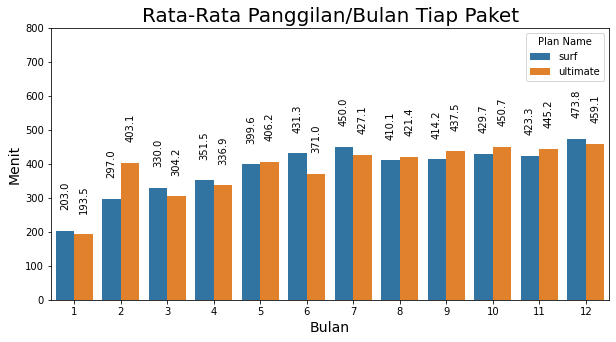

In [49]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
calls_mean_per_month = user_usage_report.pivot_table(index=['month','plan'], values='minutes_usage').reset_index()

# memanggil fungsi untuk membuat barplot
bar_visualization_hue(calls_mean_per_month, 'month', 'minutes_usage', 'plan')

# fitur plot
plt.ylim(0, 800)
plt.title('Rata-Rata Panggilan/Bulan Tiap Paket', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Menit', size=14)
plt.legend(title='Plan Name')
plt.show()


Sepertinya penggua disetiap paket memiliki kecenderungan yang sama dalam penggunaan telepon. dapat dilihat diagram batangnya berdiri hampir sama tinggi untuk setiap paket.

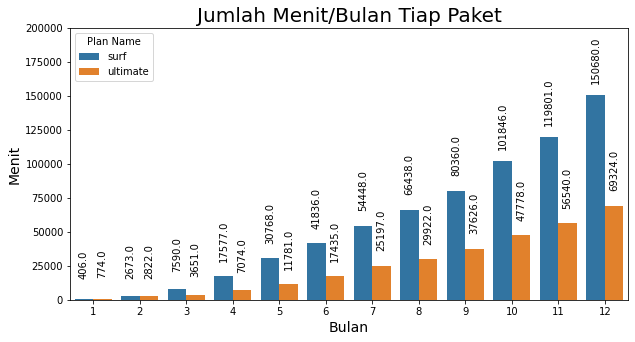

In [50]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. 
total_calls = user_usage_report.pivot_table(index=['month','plan'], values='minutes_usage', aggfunc='sum').reset_index()
# memanggil fungsi untuk visualisasi
bar_visualization_hue(total_calls, 'month', 'minutes_usage', 'plan')

# fitur plot
plt.ylim(0, 200000)
plt.title('Jumlah Menit/Bulan Tiap Paket', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Menit', size=14)
plt.legend(title='Plan Name', loc='upper left')
plt.show()

Sepertinya jumlah menit yang digunakan paket surf terdiri dari 2x lipat paket ultimate. Untuk itu mari kita lihat berapa banyak pengguna disetiap paket, serta menghitung rata-rata dan variance-nya.

In [51]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
plans_group = total_calls.pivot_table(index='plan', values='minutes_usage', aggfunc=['mean',np.var])
plans_group.columns = ['mean','variance']
plans_group['variance'] = round(plans_group['variance'], 2)
# mendapatkan jumlah total pengguna tiap paket
total_member_per_plan = df_user.pivot_table(index='plan', values='user_id', aggfunc='count')
total_member_per_plan.columns = ['total_user']
# menggabungkan kedua tabel
plans_group_mean_var = total_member_per_plan.join(plans_group)


plans_group_mean_var

,total_user,mean,variance
plan,,,
surf,339,56201.916667,2.402963e+09
ultimate,161,25827.000000,5.219595e+08


Pantas saja jumlah menit yang digunakan paket surf lebih banyak dari pada ultimate, ternyata jumlah penggunanya lebih banyak 2x lipat dari pada pengguna paket ultimate.

In [52]:
# menghitung varians pengguna paket surf
np.var(total_calls.query('plan == "surf"')['minutes_usage'])

2202716344.5763893

In [53]:
# menghitung varians pengguna paket ultimate
np.var(total_calls.query('plan == "ultimate"')['minutes_usage'])

478462892.0

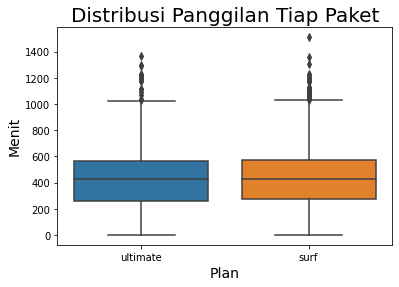

In [54]:
# membuat grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
box_plans = sns.boxplot(data=user_usage_report, x='plan', y='minutes_usage')

plt.title('Distribusi Panggilan Tiap Paket', size=20)
plt.xlabel('Plan', size=14)
plt.ylabel('Menit', size=14)
plt.show()

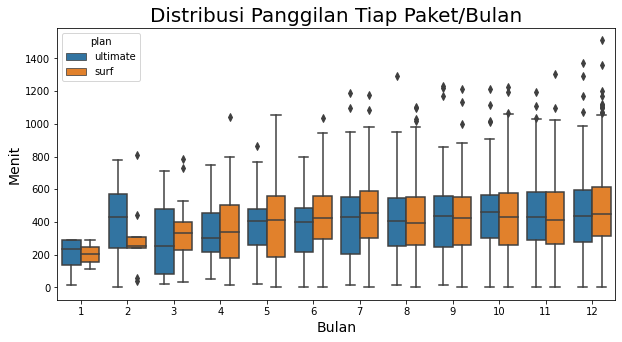

In [55]:
# membuat boxplot distribusi panggilan pengguna tiap paket perbulan
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=user_usage_report, x='month', y='minutes_usage', hue='plan', ax=ax)
plt.title('Distribusi Panggilan Tiap Paket/Bulan', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Menit', size=14)
plt.show()

**Kesimpulan**

Berdasarkan data pengguna tiap paket dapat ditarik beberapa kesimpulan diantaranya:

- Dilihat untuk rata-rata penggunaan telepon disetiap paket hampir sama dan meningkat seiring bertambahnya bulan. 
- Untuk jumlah menit yang digunakan, pengguna paket surf cenderung lebih banyak dari pada paket ultimate, hal ini dikarenakan jumlah pengguna paket surf lebih banyak 2x lipat dari pengguna ultimate.
- Untuk penggunaan menit disetiap paket dari boxplot dapat dilihat bahwa tiap pengguna menghabiskan dari 1 sampai 600 menit tiap bulannya, namun ada beberapa pengguna yang menggunakan lebih dari 600menit.

Dari keseluruhan dapat disimpulkan untuk kedua paket para pengguna cenderung memiliki perilaku yang sama dalam panggilan disetiap bulannya. Namun, dari data sepertinya Megaline lebih banyak mendapat keuntungan dari pengguna paket surf karena para pengguna pada paket ini cenderung menggunakan menit lebih dari yang difasilitasi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Pesan/SMS

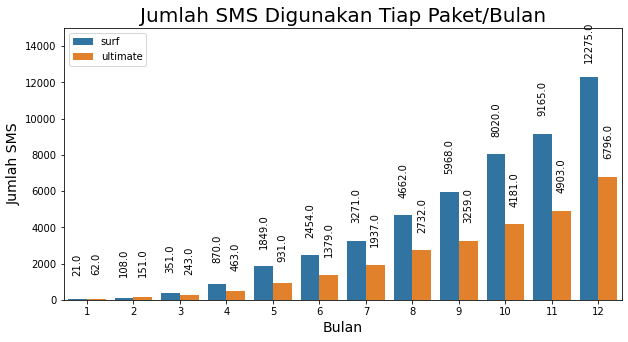

In [56]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya

message_total = user_usage_report.pivot_table(index=['month','plan'], values='message_usage', aggfunc='sum').reset_index()

# memanggil fungsi untuk visualisasi
bar_visualization_hue(message_total, 'month', 'message_usage', 'plan')

# fitur plot
plt.ylim(0, 15000)
plt.title('Jumlah SMS Digunakan Tiap Paket/Bulan', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Jumlah SMS', size=14)
plt.legend(loc='upper left')
plt.show()

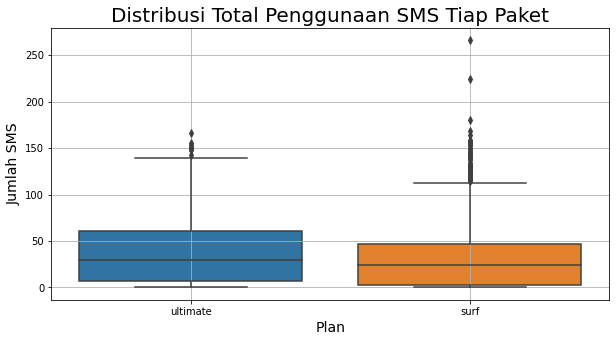

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=user_usage_report, x='plan', y='message_usage', ax=ax)
plt.grid(True)
plt.title('Distribusi Total Penggunaan SMS Tiap Paket', size=20)
plt.xlabel('Plan', size=14)
plt.ylabel('Jumlah SMS', size=14)
plt.show()

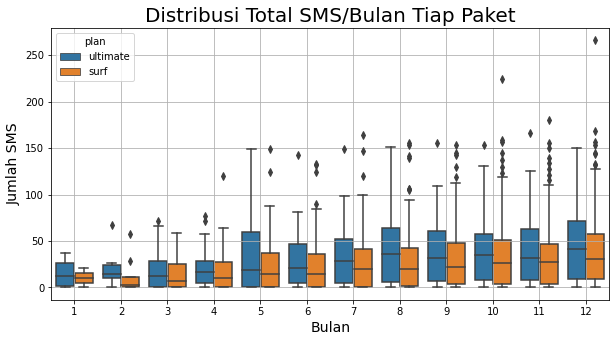

In [58]:
# Bandingkan jumlah SMS yang dihabiskan oleh pengguna per paket
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=user_usage_report, x='month', y='message_usage', hue='plan', ax=ax)
plt.grid(True)
plt.title('Distribusi Total SMS/Bulan Tiap Paket', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Jumlah SMS', size=14)
plt.show()

**Kesimpulan**

Penggunaan SMS pada pengguna yang paket `surf` lebih sedikit dari pada pengguna `ultimate`, serta ada beberapa pengguna yang menggunakan paket SMS melebihi dari kuota yang disediakan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Internet

Saatnya mengamati perilaku pengguna dalam penggunaan internet.

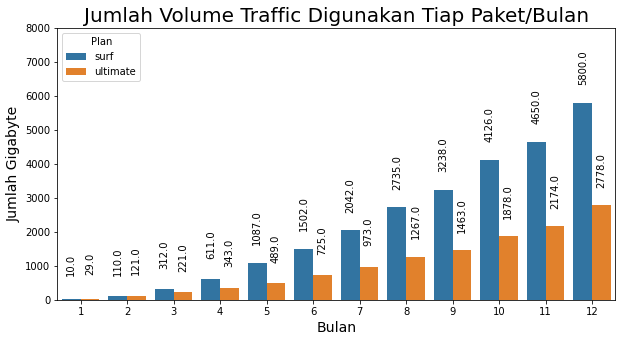

In [59]:
# Jumlah Volume Traffic yang cenderung dipakai pengguna tiap paket per bulannya
traffic_total = user_usage_report.pivot_table(index=['month','plan'], values='traffic_usage', aggfunc='sum').reset_index()
# Mendapatkan jumlah gigabyte karena jumlah megabyte terlalu banyak sehingga sulit untuk membaca grafik
# memanggil fungsi untuk visualisasi
bar_visualization_hue(traffic_total, 'month', 'traffic_usage', 'plan')
# fitur plot
plt.ylim(0, 8000)
plt.title('Jumlah Volume Traffic Digunakan Tiap Paket/Bulan', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Jumlah Gigabyte', size=14)
plt.legend(loc='upper left', title='Plan')
plt.show()

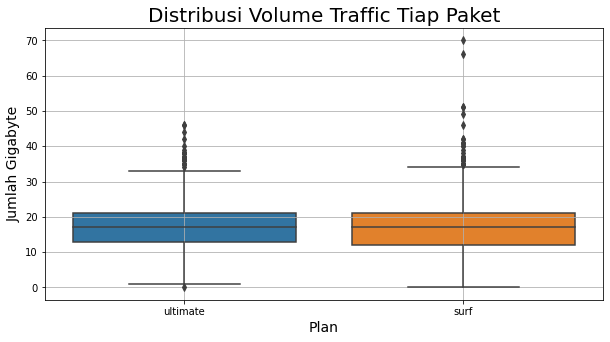

In [60]:
# Bandingkan jumlah Volume Traffic yang dihabiskan oleh pengguna per paket
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(data=user_usage_report, x='plan', y='traffic_usage', ax=ax)
plt.grid(True)
plt.title('Distribusi Volume Traffic Tiap Paket', size=20)
plt.xlabel('Plan', size=14)
plt.ylabel('Jumlah Gigabyte', size=14)
plt.show()

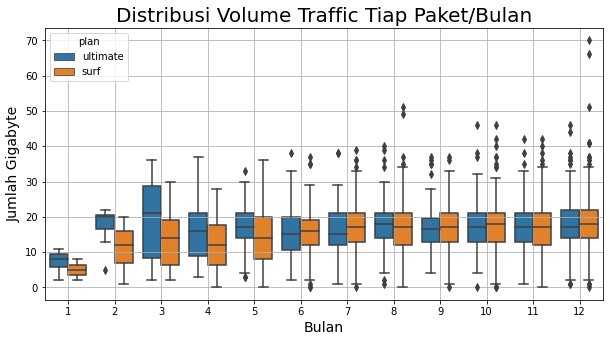

In [61]:
# Bandingkan jumlah Volume Traffic yang dihabiskan oleh pengguna tiap paket per bulan
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(data=user_usage_report, x='month', y='traffic_usage', hue='plan', ax=ax)
plt.grid(True)
plt.title('Distribusi Volume Traffic Tiap Paket/Bulan', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Jumlah Gigabyte', size=14)
plt.show()

**Kesimpulan**

Pada volume penggunaan internet distribusi pengguna tiap bulannya hampir sama berada disekitar 20GB, hal ini tentu untuk pengguna paket `surf` mendapat biaya tambahan karena menggunakan internet melebihi kuota yang difasilitaskan. Dan dalam hal volume penggunaan internet sepertinya perusahaan Megaline mendapatkan keuntungan yang lebih pada paket `surf` dibandingkan `ultimate`.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pendapatan

Yuk lanjut kita akan menghitung pendapatan dari tiap paket yang disediakan Megaline kepada penggunanya.

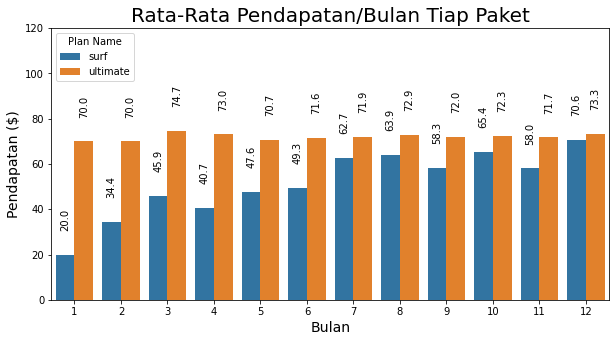

In [62]:
# menghitung pendapatan rata-rata tiap paket perbulan
profits_mean_per_month = user_usage_report.pivot_table(index=['plan','month'], values='profit_per_month').reset_index()

# memanggil fungsi utk visualisasi
bar_visualization_hue(profits_mean_per_month, 'month', 'profit_per_month', 'plan')

# fitur plot
plt.ylim(0, 120)
plt.title('Rata-Rata Pendapatan/Bulan Tiap Paket', size=20)
plt.xlabel('Bulan', size=14)
plt.ylabel('Pendapatan ($)', size=14)
plt.legend(title='Plan Name', loc='upper left')
plt.show()

Rata-rata pendapatan untuk paket `ultimate` cenderung stabil tiap bulannya, namun untuk paket `surf` terjadi peningkatan dari awal hingga akhir tahun. Saatnya menghitung total pendapatan yang didapatkan dari setiap paket.

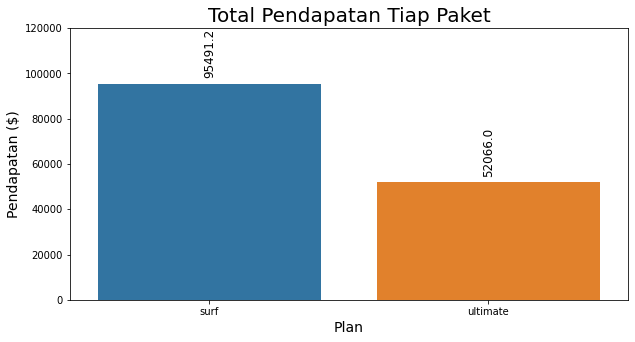

In [63]:
# menghitung total pendapatan
total_profits = user_usage_report.pivot_table(index='plan', values='profit_per_month', aggfunc='sum').reset_index()

# memanggil fungsi utk visualisasi
bar_visualization(total_profits, 'plan', 'profit_per_month')

# fitur plot
plt.ylim(0, 120000)
plt.title('Total Pendapatan Tiap Paket', size=20)
plt.xlabel('Plan', size=14)
plt.ylabel('Pendapatan ($)', size=14)
plt.show()

**Kesimpulan**

Yap, seperti yang kita perhatikan pada kecenderungan pengguna paket `surf` dalam penggunaan telepon, dan internet sebelumnya serta jumlah pengguna yang menggunakan paket `surf` lebih banyak dari pada paket `ultimate`. Tentu saja paket `Surf` lebih menguntungkan dibandingkan `Ultimate`.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Menguji Hipotesis Statistik

Ada 2 hipotesis yang diuji yaitu:
- Pendapatan rata-rata dari pengguna paket prabayar `Ultimate` dan `Surf` berbeda.
- Pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Untuk menguji mari kita tambahkan pendapatan jumlah pendapatan pada dataset `df_user` berdasarkan `user_id`. Kemudian tambahkan kolom region dengan value-nya ada 2, yaitu `NY-NJ` dan `Other`, hal ini dilakukan untuk pengujian hipotesis kedua.

In [64]:
# menambahkan kolom region ke dataset user_sage_report
user_usage_report = user_usage_report.merge(df_user[['user_id','region']], on='user_id', how='left')

In [65]:
# memeriksa sample utk uji hipotesis
user_usage_report.sample(10)

,user_id,month,traffic_usage,calls_count,minutes_usage,message_usage,plan,profit_per_month,region
1904,1408,2,12.0,53.0,443.0,29.0,surf,20.0,Other
142,1039,10,14.0,59.0,457.0,23.0,ultimate,70.0,Other
49,1011,9,17.0,73.0,484.0,60.0,ultimate,70.0,Other
1006,1211,9,18.0,41.0,331.0,50.0,ultimate,70.0,NY-NJ-PA MSA
1324,1283,11,4.0,14.0,87.0,11.0,ultimate,70.0,Other
607,1128,10,20.0,5.0,35.0,37.0,ultimate,70.0,Other
782,1163,11,26.0,82.0,584.0,10.0,ultimate,70.0,Other
763,1159,11,14.0,119.0,856.0,94.0,ultimate,70.0,Other
2088,1454,8,23.0,35.0,305.0,78.0,ultimate,70.0,Other
659,1139,11,8.0,20.0,156.0,26.0,surf,20.0,Other


**Menguji hipotesis Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda**

Disini kita menetapkan :
* H0 nya adalah "Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf merupakan **sama**".
* H1 atau alternatifnya adalah "Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf **berbeda**".

Mari kita hitung variansnya terlebih dahulu, jika variansnya berbeda kita dapat mengatur equal_var = False.

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- H0 dan H1 nya kok sama ?
    - harusnya H0 nya itu SAMA bukan BERBEDA

</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


In [66]:
# menghitung varians dari pengguna paket surf
np.var(user_usage_report.query('plan == "surf"')['profit_per_month'])

3065.8848438690247

In [67]:
# menghitung variasn dari pengguna paket ultimate
np.var(user_usage_report.query('plan == "ultimate"')['profit_per_month'])

129.66814043209877

<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- untuk ini harusnya menggunakan user_usage_report ya bukan final_data

</div>
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik sudah dilakukan sesuai arahan kak.
</div>

<div class="alert alert-dan">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

Mari kita lanjutkan untuk menguji hipotesis, apakah hipotesis diterima apa ditolak.

In [68]:
# Uji hipotesisnya

alpha = 0.05
results = st.ttest_ind(user_usage_report.query('plan == "surf"')['profit_per_month'],
                       user_usage_report.query('plan == "ultimate"')['profit_per_month'], 
                       equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Hipotesis Nol (0) di Tolak !")
else:
    print("Kita tidak bisa menolak hipotesis 0")


p-value: 3.17039054811355e-15
Hipotesis Nol (0) di Tolak !


<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- untuk ini harusnya menggunakan user_usage_report ya bukan final_data

</div>
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik sudah dilakukan sesuai arahan kak
</div>

Untuk kasus ini dapat dilihat pengujian hipotesisnya ditolak karena pvalue nya lebih kecil dari alpha. 

**Menguji hipotesis Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda**

Disini kita menetapkan :
* H0 atau alternatifnya adalah "Rata-rata pendapatan dari pengguna di wilayah NY-NJ **sama persis** dengan pendapatan pengguna dari wilayah lain."
* H1 nya adalah "Rata-rata pendapatan dari pengguna di wilayah NY-NJ **berbeda** dengan pendapatan pengguna dari wilayah lain."

Mari kita hitung variansnya terlebih dahulu, jika variansnya berbeda kita dapat mengatur equal_var = False.

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- H0 dan H1 nya terbalik ya

</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>


In [69]:
# menghitung varians dari region NY-NJ-PA
np.var(user_usage_report.query('region == "NY-NJ-PA MSA"')['profit_per_month'])

1890.5177172681156

In [70]:
# menghitung varians dari region Other
np.var(user_usage_report.query('region == "Other"')['profit_per_month'])

2223.8866958162175

<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- untuk ini harusnya menggunakan user_usage_report ya bukan final_data

</div>


In [72]:
# Uji hipotesisnya

alpha = 0.05
results = st.ttest_ind(user_usage_report.query('region == "NY-NJ-PA MSA"')['profit_per_month'], 
                       user_usage_report.query('region == "Other"')['profit_per_month'], equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis 0 !")
else:
    print("Kita tidak bisa menolak hipotesis 0 !")


p-value: 0.03352561588530014
Kita menolak hipotesis 0 !


<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- untuk ini harusnya menggunakan user_usage_report ya bukan final_data

</div>


Dan inipun nilai nya kecil dari alpha, berarti hipotesis yang benar "Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain"

# Kesimpulan Umum

Kita telah menganalisis perilaku pengguna disetiap paket layanan yang disediakan oleh perusahaan Megaline. Saat memeriksa dataset yang diberikan, terdapat beberapa kolom disetiap dataset yang tidak sesuai standarnya. Untuk itu kita telah mengubah dan menambahkan beberapa kolom untuk memperbaiki kualitas data tersebut. 

Kemudian dari keseluruhan data yang diperoleh, total pengguna ada 500. Sedangkan laporan panggilan, SMS, dan internet ternyata tidak lengkap untuk semua pengguna yang berjumlah 500. Nah, karena laporan pengguna tidak lengkap tentu saja kita mendapat menghitung pendapatan dari pengguna tersebut, akan tetapi dilihat dari statusnya bahwa pengguna tersebut masih berlangganan paket layanan di perusahaan Megaline. Untuk itu kita menghitung pendapatan pengguna yang tidak terdaftar dilaporan tersebut dengan cara : **profit = 12 - bulan terdaftar * harga paket bulanan**.

Lalu ada 2 hipotesis yang telah diuji. Dalam pengujian hipotesis menggunakan pengujian hipotesis persamaan rata-rata dua populasi dan hasilnya adalah:
- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Masukan untuk perusahaan Megaline adalah coba untuk menambah lebih banyak lagi pengguna yang menggunakan paket `Surf`. Karena kita lihat pengguna yang tertarik menggunakan paket `Surf` lebih banyak dari pada `Ultimate`. Akan tetapi, pengguna paket `Surf` sering menggunakan layanan melebihi kuota yang disediakan, dan mereka harus membayar lebih untuk itu. 

[Kembali ke halaman utama](#back)